In [248]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

In [164]:
pets = pd.read_csv('train.csv')
pets2 = pd.read_csv('test.csv')
petID = pets2.PetID

In [ ]:
def add_pure(dataframe):
    #create new column and set values to 0 by default
    dataframe['pure_bred'] = 0

    #For loop to check if pet is pure bred and change the values accordingly
    for i in range(0,(len(pets)-1)):
        try:
            if dataframe.Breed2[i] == 0 or (dataframe.Breed1[i] == dataframe.Breed2[i]):
                dataframe.iat[i, dataframe.columns.get_loc('pure_bred')] = 1
        except:
            continue
    return (dataframe)
    #pets.pure_bred.value_counts(dropna = False)

def add_sentiments(dataframe):
    dataframe['sentiment_score'] = None
    dataframe['sentiment_magnitude'] = None

    for i in range(0,(len(dataframe)-1)):
        filename = 'test_sentiment/' + dataframe.PetID[i] + '.json'
        try:
            with open(filename, 'r') as f:
                sentiments = json.load(f)
                dataframe.iat[i, dataframe.columns.get_loc('sentiment_score')] = sentiments['documentSentiment']['score']
                dataframe.iat[i, dataframe.columns.get_loc('sentiment_magnitude')] = sentiments['documentSentiment']['magnitude']
        except FileNotFoundError:
            continue
    return (dataframe)
    dataframe.sentiment_score.value_counts(dropna = False)
    
def create_cats(dataframe):
    for i in dataframe.columns:
        #if i is not dataframe.columns[2] and i is not dataframe.columns[10] and i is not dataframe.columns[15] and i is not dataframe.columns[18] and i is not dataframe.columns[22] and i is not dataframe.columns[25] and i is not dataframe.columns[26]:
        if i not in ['Age', 'FurLength', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt', 'sentiment_score', 'sentiment_magnitude']:
            dataframe[i] = dataframe[i].astype('category')

def sentiment_to_float(dataframe):
    dataframe.sentiment_score = pd.to_numeric(dataframe.sentiment_score)
    dataframe.sentiment_magnitude = pd.to_numeric(dataframe.sentiment_magnitude)

In [ ]:
add_pure(pets)
add_pure(pets2)
add_sentiments(pets)
add_sentiments(pets2)
create_cats(pets)
create_cats(pets2)
sentiment_to_float(pets)
sentiment_to_float(pets2)

pets = pets.drop(['Name', 'PetID', 'Description','RescuerID'], axis = 1)
pets = pets.dropna()

pets2 = pets2.drop(['Name', 'PetID', 'Description','RescuerID'], axis = 1)
pets2 = pets2.dropna()

In [ ]:
sns.countplot(x='AdoptionSpeed', data = pets)

In [ ]:
pets.groupby('AdoptionSpeed').mean()

In [ ]:
pets_vars = pets.columns.tolist()
adopt = ['AdoptionSpeed']
X=[i for i in pets_vars if i not in adopt]

os_data_X = pd.DataFrame(data=pets[X],columns=X )
os_data_y= pd.DataFrame(data=pets[adopt],columns=adopt)

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(pets[X], pets[adopt].values.ravel())

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
new_X = []
for i in range(0,len(X)):
    if str(rfe.support_[i]) is not 'False':
        new_X.append(str(X[i]))

In [ ]:
y = pets[adopt]
new_XX = np.asarray(pets[new_X])
logit_model=sm.MNLogit(y.astype(float),new_XX.astype(float))
result=logit_model.fit()
print(result.summary2())

In [ ]:
logreg = LogisticRegression()
logreg.fit(new_XX.astype(float),y.astype(float))

In [ ]:
test_X = np.asarray(pets2[new_X])

In [ ]:
y_pred = logreg.predict(test_X.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(new_XX.astype(float), y.astype(float))))

In [ ]:
for i in range(0,len(y_pred)-1):
    print(pets3.PetID[i], int(y_pred[i]))

In [165]:
pets.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### Create New Column for Pure Bred (Values: 1 if pure bred, 0 if mixed breed.

In [166]:
#create new column and set values to 0 by default
pets['pure_bred'] = 0

#For loop to check if pet is pure bred and change the values accordingly
for i in range(0,(len(pets)-1)):
    if pets.Breed2[i] == 0 or (pets.Breed1[i] == pets.Breed2[i]):
        pets.iat[i, pets.columns.get_loc('pure_bred')] = 1
        
#pets.pure_bred.value_counts(dropna = False)

### Fetch sentiment analysis values from JSON files and append the values into new columns

In [167]:
pets['sentiment_score'] = None
pets['sentiment_magnitude'] = None

for i in range(0,(len(pets)-1)):
    filename = 'train_sentiment/' + pets.PetID[i] + '.json'
    try:
        with open(filename, 'r') as f:
            sentiments = json.load(f)
            pets.iat[i, pets.columns.get_loc('sentiment_score')] = sentiments['documentSentiment']['score']
            pets.iat[i, pets.columns.get_loc('sentiment_magnitude')] = sentiments['documentSentiment']['magnitude']
    except FileNotFoundError:
        continue

pets.sentiment_score.value_counts(dropna = False)

 0.0    2328
 0.3    2177
 0.2    2168
 0.1    1966
 0.4    1598
 0.5    1164
 0.6     717
 0.9     633
NaN      552
 0.8     508
 0.7     466
-0.1     295
-0.2     167
-0.3     102
-0.4      43
-0.5      35
-0.6      28
-0.7      22
-0.8      16
-0.9       8
Name: sentiment_score, dtype: int64

In [168]:
pets

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,pure_bred,sentiment_score,sentiment_magnitude
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0.3,2.4
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,-0.2,0.7
2,1,Brisco,1,307,0,1,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1,0.2,3.7
3,1,Miko,4,307,0,2,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1,0.9,0.9
4,1,Hunter,1,307,0,1,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1,0.6,3.7
5,2,NaN,3,266,0,2,5,6,0,2,...,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1,0,0.2
6,2,BULAT,12,264,264,1,1,0,0,2,...,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1,0.2,0.5
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,1,0.1,0.9
8,2,NaN,2,265,0,2,6,0,0,2,...,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1,0.1,0.5
9,2,Kitty,12,265,0,2,1,7,0,2,...,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,1,0.2,1.1


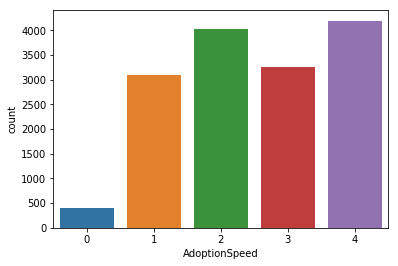

In [169]:
sns.countplot(x='AdoptionSpeed', data = pets)

In [170]:
pets.groupby('AdoptionSpeed').mean()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,pure_bred
AdoptionSpeed,,,,,,,,,,,,,,,,,,,,
0,1.585366,10.451220,251.097561,96.575610,1.721951,2.402439,3.509756,2.158537,1.775610,1.663415,1.785366,1.643902,2.000000,1.046341,1.414634,22.085366,41347.480488,0.060976,3.324390,0.695122
1,1.535599,8.488350,255.885113,73.209061,1.727508,2.374434,3.339482,1.869903,1.821359,1.548544,1.800324,1.598058,1.994822,1.030097,1.464401,21.822330,41346.546602,0.044984,3.727184,0.799029
2,1.463958,8.823631,265.928908,72.624474,1.744860,2.233589,3.251672,1.910329,1.862026,1.467179,1.747089,1.540253,1.926431,1.029230,1.551400,21.582611,41345.193213,0.063413,4.071836,0.812485
3,1.401964,10.189936,262.409328,80.782755,1.806689,2.169684,3.248236,1.820497,1.885548,1.435410,1.681497,1.499540,1.867444,1.036821,1.534213,20.151580,41343.587297,0.072722,4.620743,0.793188
4,1.424827,13.667858,275.160829,68.467953,1.823684,2.165118,3.061472,1.884441,1.882059,1.413867,1.698356,1.585180,1.871098,1.047415,1.730284,21.315702,41348.203717,0.046223,3.319990,0.870145


In [171]:
#pets.columns

In [172]:
#Create Categorical Variables
for i in pets.columns:
    if i is not pets.columns[2] and i is not pets.columns[10] and i is not pets.columns[15] and i is not pets.columns[18] and i is not pets.columns[22] and i is not pets.columns[25] and i is not pets.columns[26]:
        pets[i] = pets[i].astype('category')

In [186]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14441 entries, 0 to 14991
Data columns (total 23 columns):
Type                   14441 non-null category
Age                    14441 non-null int64
Breed1                 14441 non-null category
Breed2                 14441 non-null category
Gender                 14441 non-null category
Color1                 14441 non-null category
Color2                 14441 non-null category
Color3                 14441 non-null category
MaturitySize           14441 non-null category
FurLength              14441 non-null int64
Vaccinated             14441 non-null category
Dewormed               14441 non-null category
Sterilized             14441 non-null category
Health                 14441 non-null category
Quantity               14441 non-null int64
Fee                    14441 non-null category
State                  14441 non-null category
VideoAmt               14441 non-null category
PhotoAmt               14441 non-null float64
Adoption

In [180]:
#drop the name column from the dataframe
pets = pets.drop(['Name', 'PetID', 'Description','RescuerID'], axis = 1)
#drop all null values; otherwise logistic regression cannot run
pets = pets.dropna()

### Perform Best - Subset Selection:
#### Using Recursive Feature Elimination

In [184]:
pets_vars = pets.columns.tolist()
adopt = ['AdoptionSpeed']
X=[i for i in pets_vars if i not in adopt]

os_data_X = pd.DataFrame(data=pets[X],columns=X )
os_data_y= pd.DataFrame(data=pets[adopt],columns=adopt)

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(pets[X], pets[adopt].values.ravel())

In [185]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False False False  True  True  True  True
  True  True False False False  True False  True  True False]
[ 1  8  9 11  1  5  7  6  1  1  1  1  1  1  2 10 12  1  3  1  1  4]


In [196]:
pets.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed', 'pure_bred', 'sentiment_score',
       'sentiment_magnitude'],
      dtype='object')

In [193]:
type(rfe.support_)

numpy.ndarray

In [236]:
new_X = []
for i in range(0,len(X)):
    if str(rfe.support_[i]) is not 'False':
        new_X.append(str(X[i]))
new_X

In [237]:
pets.info()
pets.sentiment_score = pd.to_numeric(pets.sentiment_score)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14441 entries, 0 to 14991
Data columns (total 23 columns):
Type                   14441 non-null category
Age                    14441 non-null int64
Breed1                 14441 non-null category
Breed2                 14441 non-null category
Gender                 14441 non-null category
Color1                 14441 non-null category
Color2                 14441 non-null category
Color3                 14441 non-null category
MaturitySize           14441 non-null category
FurLength              14441 non-null int64
Vaccinated             14441 non-null category
Dewormed               14441 non-null category
Sterilized             14441 non-null category
Health                 14441 non-null category
Quantity               14441 non-null int64
Fee                    14441 non-null category
State                  14441 non-null category
VideoAmt               14441 non-null category
PhotoAmt               14441 non-null float64
Adoption

In [249]:
y = pets[adopt]
new_XX = np.asarray(pets[new_X])
logit_model=sm.MNLogit(y.astype(float),new_XX.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 1.438865
         Iterations 7
                         Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.017      
Dependent Variable: AdoptionSpeed    AIC:              41645.2990 
Date:               2019-01-03 05:19 BIC:              41978.7234 
No. Observations:   14441            Log-Likelihood:   -20779.    
Df Model:           40               LL-Null:          -21137.    
Df Residuals:       14397            LLR p-value:      6.8678e-125
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-----------------------------------------------------------------
AdoptionSpeed = 0  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
              x1   0.0030   0.1054  0.0287 0.9771 -0.2036  0.2097
              x2   0.1269   0.0787  1.6135 0.1066 -0.027

In [258]:
pets2 = pd.read_csv('test.csv')

In [311]:
def add_pure(dataframe):
    #create new column and set values to 0 by default
    dataframe['pure_bred'] = 0

    #For loop to check if pet is pure bred and change the values accordingly
    for i in range(0,(len(pets)-1)):
        try:
            if dataframe.Breed2[i] == 0 or (dataframe.Breed1[i] == dataframe.Breed2[i]):
                dataframe.iat[i, dataframe.columns.get_loc('pure_bred')] = 1
        except:
            continue
    return (dataframe)
    #pets.pure_bred.value_counts(dropna = False)

def add_sentiments(dataframe):
    dataframe['sentiment_score'] = None
    dataframe['sentiment_magnitude'] = None

    for i in range(0,(len(dataframe)-1)):
        filename = 'test_sentiment/' + dataframe.PetID[i] + '.json'
        try:
            with open(filename, 'r') as f:
                sentiments = json.load(f)
                dataframe.iat[i, dataframe.columns.get_loc('sentiment_score')] = sentiments['documentSentiment']['score']
                dataframe.iat[i, dataframe.columns.get_loc('sentiment_magnitude')] = sentiments['documentSentiment']['magnitude']
        except FileNotFoundError:
            continue
    return (dataframe)
    dataframe.sentiment_score.value_counts(dropna = False)
    
def create_cats(dataframe):
    for i in dataframe.columns:
        #if i is not dataframe.columns[2] and i is not dataframe.columns[10] and i is not dataframe.columns[15] and i is not dataframe.columns[18] and i is not dataframe.columns[22] and i is not dataframe.columns[25] and i is not dataframe.columns[26]:
        if i not in ['Age', 'FurLength', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt', 'sentiment_score', 'sentiment_magnitude']:
            dataframe[i] = dataframe[i].astype('category')

def sentiment_to_float(dataframe):
    dataframe.sentiment_score = pd.to_numeric(dataframe.sentiment_score)
    dataframe.sentiment_magnitude = pd.to_numeric(dataframe.sentiment_magnitude)


In [309]:
pets2 = add_pure(pets2)
pets2 = add_sentiments(pets2)


In [310]:
create_cats(pets2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 26 columns):
Type                   3948 non-null category
Name                   3645 non-null category
Age                    3948 non-null int64
Breed1                 3948 non-null category
Breed2                 3948 non-null category
Gender                 3948 non-null category
Color1                 3948 non-null category
Color2                 3948 non-null category
Color3                 3948 non-null category
MaturitySize           3948 non-null category
FurLength              3948 non-null int64
Vaccinated             3948 non-null category
Dewormed               3948 non-null category
Sterilized             3948 non-null category
Health                 3948 non-null category
Quantity               3948 non-null int64
Fee                    3948 non-null int64
State                  3948 non-null category
RescuerID              3948 non-null category
VideoAmt               3948 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 26 columns):
Type                   3948 non-null category
Name                   3645 non-null category
Age                    3948 non-null int64
Breed1                 3948 non-null category
Breed2                 3948 non-null category
Gender                 3948 non-null category
Color1                 3948 non-null category
Color2                 3948 non-null category
Color3                 3948 non-null category
MaturitySize           3948 non-null category
FurLength              3948 non-null int64
Vaccinated             3948 non-null category
Dewormed               3948 non-null category
Sterilized             3948 non-null category
Health                 3948 non-null category
Quantity               3948 non-null int64
Fee                    3948 non-null int64
State                  3948 non-null category
RescuerID              3948 non-null category
VideoAmt               3948 non

In [312]:
sentiment_to_float(pets2)

In [315]:
pets2 = pets2.drop(['Name', 'PetID', 'Description','RescuerID'], axis = 1)
pets2 = pets2.dropna()

In [316]:
pets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3946
Data columns (total 22 columns):
Type                   3814 non-null category
Age                    3814 non-null int64
Breed1                 3814 non-null category
Breed2                 3814 non-null category
Gender                 3814 non-null category
Color1                 3814 non-null category
Color2                 3814 non-null category
Color3                 3814 non-null category
MaturitySize           3814 non-null category
FurLength              3814 non-null int64
Vaccinated             3814 non-null category
Dewormed               3814 non-null category
Sterilized             3814 non-null category
Health                 3814 non-null category
Quantity               3814 non-null int64
Fee                    3814 non-null int64
State                  3814 non-null category
VideoAmt               3814 non-null int64
PhotoAmt               3814 non-null float64
pure_bred              3814 non-nul

In [280]:
len(pets2.columns)

26

In [250]:
logreg = LogisticRegression()
logreg.fit(new_XX.astype(float),y.astype(float))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [318]:
test_X = np.asarray(pets2[new_X])

In [323]:
y_pred = logreg.predict(test_X.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(new_XX.astype(float), y.astype(float))))

Accuracy of logistic regression classifier on test set: 0.31


In [320]:
for i in y_pred:
    print(int(i))

4
4
4
3
4
4
4
2
4
2
4
1
4
4
4
4
4
4
1
4
4
3
2
4
4
4
4
4
1
4
4
4
4
4
3
3
4
2
1
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
2
4
2
4
4
4
4
4
4
4
3
1
4
4
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
4
4
4
1
4
4
4
4
3
4
4
4
4
4
4
4
2
3
4
4
2
4
4
4
3
4
3
4
2
2
4
4
4
4
4
1
4
1
4
2
4
1
4
4
4
2
2
2
2
1
2
2
2
4
1
2
2
2
4
2
2
4
2
2
2
4
2
1
2
2
2
2
4
2
2
2
2
2
4
3
2
4
2
2
2
2
2
2
2
2
2
2
2
4
4
4
2
2
2
4
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
2
4
1
2
2
2
2
2
4
4
2
1
2
2
2
4
4
2
3
4
4
4
2
2
3
4
4
4
4
4
4
3
1
1
4
3
1
4
4
4
2
4
4
4
3
2
3
4
3
4
4
2
4
3
3
3
4
2
2
2
4
4
4
4
4
4
4
2
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
4
2
1
4
1
4
4
4
1
4
4
2
4
1
4
4
3
1
2
4
2
4
4
4
4
4
4
4
4
4
4
2
4
2
2
4
2
4
4
4
4
4
4
4
4
4
4
4
1
2
4
4
4
2
4
2
4
2
2
4
4
4
4
4
4
4
2
4
2
2
4
4
4
4
4
4
4
2
2
4
4
2
4
4
3
4
4
2
4
4
2
4
4
4
2
4
4
4
3
2
2
2
1
2
1
1
1
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
4
2
4
4
4
4
2
2
4
2
4
4
4
4
2
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
2
2
4
2
2
1
2
2
4
4
3
2
4
4
4
2
1
4
4
2
4
2
2
2
2
4
3


In [326]:
type(y_pred)
type(pets3.PetID)

pandas.core.series.Series

In [324]:

for i in range(0,len(y_pred)-1):
    print(pets3.PetID[i], int(y_pred[i]))

378fcc4fc 4
73c10e136 4
72000c4c5 4
e147a4b9f 3
43fbba852 4
77a490ec9 4
28c4b1b13 4
d1eada628 2
d134dec34 4
bcd464bb8 2
4e21958c3 4
7b070aed6 1
ff8d0708f 4
f1e6c9bf3 4
248914c05 4
948002885 4
111e67cd2 4
4f4b2ede1 4
d77fca061 1
ac9fb74b9 4
47ef39e7a 4
c69ee9807 3
62dcf8ecb 2
4df1d19d6 4
e8ef8455e 4
cbd23bc17 4
4d1a91ccf 4
004ee5cf7 4
95fad0a75 1
64341b5db 4
36726d4ef 4
0b56a7525 4
7f819d0db 4
550a0368b 4
9f60fc089 3
92ad0b5d6 3
a0465636d 4
257e363e0 2
ead84ae08 1
e3b8f72db 3
3dd3a9a4a 4
7d266f64e 4
ee31cafb8 4
39795544e 4
bd401c9d7 4
ca34f08c5 4
f28185f8b 4
578ded1cf 4
075c67b05 4
2d3f76a93 4
c9049c53d 4
d51a9f925 4
1d4d82bda 4
e56ca790d 4
64d85557b 4
07dfc8e89 4
5891eb6ec 4
1e79f1a74 4
0603e450a 1
4c08175f2 4
63ea487ed 4
94738fe21 4
f8c7d5162 4
3aab441c8 4
9aaaee20a 4
99b56d294 4
35edda33d 4
348fade02 4
301b3b88b 2
59b68d2e2 4
bcb71ba05 2
b3d560f95 4
c87763ce2 4
40f5e930e 4
0e178cab1 4
ea75287c4 4
128337e08 4
1a92f6e92 4
f1eb8b164 3
959a881a3 1
699ede995 4
95b2b8d75 4
75f25bcb6 2
87c5

e2005bb4c 4
f226ec9c1 4
fbe2a5ea8 4
b09467fa2 4
dc33adc1a 4
9ab81b3e0 4
8def469fe 2
bbde3314b 4
798456e7b 4
4e4bbdba2 4
75e64c6b5 4
f7b52283c 4
d8ad6c1de 4
53d870534 4
135234f32 4
2c688db55 4
aaf22f292 4
e5db86945 4
ce8fdd720 4
6180790e2 2
3ef8e3c10 2
5765d8240 4
7f992a891 2
5a4ed9f25 2
7e322bd55 2
f8868d690 1
7e008e818 2
c228f4293 4
52acbc630 4
35c34bdfd 4
8dea28408 4
7597f4210 4
591f0a114 2
3fa5fba46 4
233d08bb1 4
ca15b54ae 2
e99160687 2
4ba858df3 2
62b065db7 3
be10ae529 2
dff8203bf 4
cf56161c2 2
1b3a195ae 4
b06e4a04b 3
67e33c026 2
21323ab5c 4
44ad04898 3
e629ebf54 4
f100e4b85 4
f9cac0fa3 3
8738eafb4 4
27b46c823 4
07b5f3344 2
d8baec065 2
45530ea77 3
d27346d04 4
13517ad21 2
bd8f9547d 4
2bd5ce781 4
7fe7b5c88 4
bdab587ee 4
287ff720d 2
6422836ad 2
614494f00 4
458683f6f 2
c4acee3dc 4
26b30a979 4
83d688b83 4
fadbbfecc 2
b13517268 4
c2602732c 4
bb134e98f 4
e69d158ac 4
46ef6e10b 2
205ce681c 2
0afed346f 4
d380a2bfc 4
610f23f00 2
e12e6c77d 1
82fd13a37 4
be4053473 2
a57ccdf7a 4
5f4c5316a 4
487d

5e6b02a87 4
0b1b7aa36 4
4de594c69 4
38c3d8dfd 4
7de87b236 4
21b9aab99 2
be7a29ccd 2
4985e9abe 4
fb7bf0ca0 4
09d59aee2 4
4bb026f02 2
efbf3fdeb 2
a818819d5 2
65fc88ea0 2
42ec28f72 2
07c6aefa5 1
449cc4db2 2
5664dd8ba 2
0a3470446 4
0cab5ddae 2
ed4913e0c 2
40b697009 1
e19165754 4
56045ba61 3
fcb54a318 2
9f36f0f04 4
777d0efca 4
ae708432d 4
365206401 1
491c028ed 4
dada7fb95 2
3fd878e1e 4
219c41ecd 3
4832858f6 4
24e0c1639 4
27959c6c3 4
e8307f240 4
8805a8cdd 4
e9dc7be0a 4
9c140b105 2
9801f4683 4
62b8e9b2f 4
01875b8d3 4
9cb0fb630 4
8d676b37d 4
bc9558ff2 4
b6bb74e90 4
13344823a 2
2285258d2 4
d765b180a 4
35a056eee 2
65cd649d0 1
5ac03395e 2
88af72d1d 2
f78fbca66 2
1c094491f 3
e02a95978 4
b4be456cd 1
57782e75f 1
6211d8c3e 1
d24706633 1
a5ae6d01f 4
a3fec2010 2
4e69d6c1d 4
81fbbb6c1 2
4fa1c4bb3 4
19697ef26 2
0225d2093 1
f17310c7a 2
46213a698 2
501f25ca4 2
a2c13fe47 2
0e0017da1 2
5083eb734 2
3f570eddd 2
79b187ddd 4
d62daa8aa 4
1eff820fd 4
74c030e17 4
d79150217 2
3ea5eb51e 4
e5a74faf8 4
173f58d6d 4
1bb5

a83316db9 4
4ec74bd2a 4
1fe6926c9 2
6cd08f9e5 4
8fab79bce 4
6bb0867d2 3
af5663a50 4
9b72b6259 4
414d8071a 4
2832e999c 2
14dac66d4 1
0723c702f 4
d8a5cbf50 4
7e53fa3c8 4
ac8a6d6b4 2
46b72a554 4
abad54d9e 3
dc799e6cf 4
66e380876 4
c9beb51d4 4
adbb5691b 4
ddff16456 2
34b07073e 2
faa44e335 2
6aee6ba64 2
ce6d26ea8 2
bf7468418 3
95d3eeb89 4
07cec96ed 4
3e5f1ed95 2
2fb2b5440 4
0e1afcba3 2
a66fac828 2
68a455136 4
b8cee8864 2
f0f332a40 2
d143d39b7 1
9f6c09778 4
ea90f4eac 4
1763f6e8c 2
32b0f73c8 4
8a44d1d0a 4
4c144f0ed 4
cec32d2d9 4
ce08bf758 3
2ce451b02 2
35ec1a697 2
9918c8c44 3
8e927101b 2
e71ce9398 4
3701826a8 3
0646fb6ba 3
e394a70d8 3
88439d7b0 4
83ba40cc6 4
f720565e5 2
590738ca0 2
f6a6a9309 4
7b709929f 4
a6f5db120 1
c9bfae3ca 4
592ff368f 1
614b290f5 4
fc5e93ddb 2
ed7eb98b9 2
9df6e927c 4
b8d8b2272 1
9c60c63f6 1
01f72959d 2
7c4c942d5 4
b37fc7248 4
599b33066 2
d5f7c611a 4
fd3d262c3 2
1bfd3fba3 2
5d9384a34 2
cbb603649 2
c2f964b3b 1
d5681d2c3 2
47536cf31 2
ae4274dd6 1
38cbd55e5 2
aff0a8156 1
42b5

In [322]:
pets3 = pd.read_csv('test.csv')
pets2.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'pure_bred', 'sentiment_score', 'sentiment_magnitude'],
      dtype='object')

In [300]:
print(pets.columns)
print(pets2.columns)

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt', 'AdoptionSpeed', 'pure_bred', 'sentiment_score',
       'sentiment_magnitude'],
      dtype='object')
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'pure_bred',
       'sentiment_score', 'sentiment_magnitude'],
      dtype='object')


In [301]:
type(pets2.columns[0])

str